In [1]:
# read data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
df2 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred.xlsx')
R_g = df['u_gold']
R_b = df['u_bitcoin']
sigma_g = df['sigma_gold']
sigma_b = df['sigma_bitcoin']
pred_g = df2['gold_pred']
pred_b = df2['bitcoin_pred']

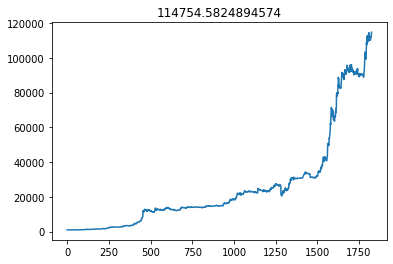

In [47]:
import numpy as np
import pandas as pd
# df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
# R_g = df['u_gold']
# R_b = df['u_bitcoin']
df3 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred_volatility.xlsx')
R_g = df3['u_gold']
R_b = df3['u_bitcoin']


# print(R_g.shape)
def cal_return(g,b,a1=0.01,a2=0.02,c0=1000):
    # g,b -> (1826,)
    n = len(g)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    # TR = 0
    for t in range(n-1):
        tran_loss =  abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])
        portfolio_value[t] = C[t] + G[t] + B[t]
        
        # print(t,C[t],G[t],B[t],portfolio_value[t],sep='\t')
        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    
    portfolio_value[n-1] = C[n-1] + G[n-1] + B[n-1]
    TR = portfolio_value[n-1] - portfolio_value[0]
    return TR,C,G,B,portfolio_value

# g = np.zeros(1826)
# b = np.zeros(1826)
# g = pso.gbest_x[:T]
# b = pso.gbest_x[T:]
# TR,C,G,B,portfolio_value = cal_return(g,b)
def simulate_resolution():
    n = len(R_g)
    a1 = 0.01
    a2 = 0.02
    c = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    rr1 = 0.25
    rr2 = 0.50
    for t in range(n-1):
        r1 = rr1 + (np.random.rand()-0.5) * 0.4
        r2 = rr2 + (np.random.rand()-0.5) * 0.8
        if abs(R_g[t+1]) > a1 :
            if R_g[t+1] < 0:
                g[t] = -G[t]*r2
            else:
                g[t] = C[t]*r1

        if abs(R_b[t+1])>a2:
            if R_b[t+1]<0:
                b[t] = -B[t]*r2
            else:
                b[t] = C[t]*r1 
        tran_loss = abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])

        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    return g,b

g,b = simulate_resolution()
TR,C,G,B,portfolio_value = cal_return(g,b)

df_res = pd.DataFrame()
df_res['date'] = df['date']
df_res['delta_g'] = g
df_res['delta_b'] = b
df_res['C'] = C
df_res['G'] = G
df_res['B'] = B
df_res['value'] = portfolio_value
plt.plot(portfolio_value)
plt.title('{}'.format(portfolio_value[-1]))
plt.show()

In [46]:
i+=1
df_res.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/随机/resolution_随机_{}.xlsx'.format(i))

In [38]:
i=0

In [15]:
df3 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred.xlsx')
gold_price = df3['gold_pred']
bitcoin_price = df3['bitcoin_pred']
def cal_volatility(price):
    n = len(price)
    u = np.zeros(n)
    sigma = np.zeros(n)
    temp = 0
    m = 0
    for i in range(n-2):
        if i < 2: 
            continue
        m+=1
        u[i+1] =( price[i+1] - price[i])/price[i]
        # print(temp, u[i+1])
        if not np.isnan(u[i+1]):
            temp += u[i+1] ** 2
            sigma[i+2] = np.sqrt(temp/m)
        else:
            # print('nan')
            m -= 1
            sigma[i+2] = sigma[i+1]
        
    return sigma, u
sigma_gold, u_gold = cal_volatility(gold_price)
sigma_bitcoin, u_bitcoin = cal_volatility(bitcoin_price)
df3['sigma_gold'] = sigma_gold
df3['u_gold'] = u_gold
df3['sigma_bitcoin'] = sigma_bitcoin
df3['u_bitcoin'] = u_bitcoin

In [16]:
df3.keys()
df3 = df3.drop('Unnamed: 0',1)
df3.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred_volatility.xlsx')

/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_90745/2180960988.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3 = df3.drop('Unnamed: 0',1)
